## Dieses Kaptiel befasst sich mit der ersten Sichtung der Daten und initiale Erkenntnisse die man daraus ziehen kann

In [2]:
# Zunächst werden die benötigten Bibliotheken importiert

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Die Daten vom store.csv und train.csv werden zusammengeführt und in einem Dataframe gespeichert

In [3]:
df1 = pd.read_csv("store.csv")
df2 = pd.read_csv("train.csv")

/tmp/ipykernel_9042/1880846029.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("train.csv")


In [4]:
df2.head()
df2.tail()

# Die Zeilen werden nach ID zusammengefasst, die Summe der Werte werden gebildet und in einer neuen Tabelle gespeichert
df3 = df2.groupby("Store").sum()

/tmp/ipykernel_9042/2769650051.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df2.groupby("Store").sum()


### Das Store und das modifizierte Train werden in einem großen Dataframe gespeichert

#### anschließend wird eine Heatmap erstellt um die Korrelationen zwischen der Sales und den Competition Spalten zu erkennen

<AxesSubplot: >

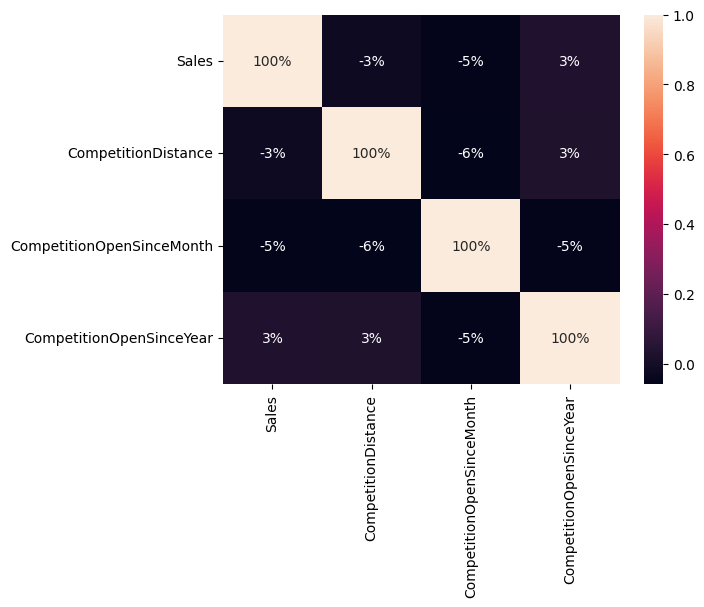

In [5]:
# Join the two dataframes using the Store column up to store id 1115 
df = pd.merge(df1, df3, on="Store")
df.head()

# plot the correltion between the columns sales and competition distance, competition open since month, competition open since year
sns.heatmap(df[["Sales", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]].corr(), annot=True, fmt=".0%")

### (TMP) Eine Heatmap zeigt die Korrelationen zwischen allen Spalten

/tmp/ipykernel_9042/533946470.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".0%")


<AxesSubplot: >

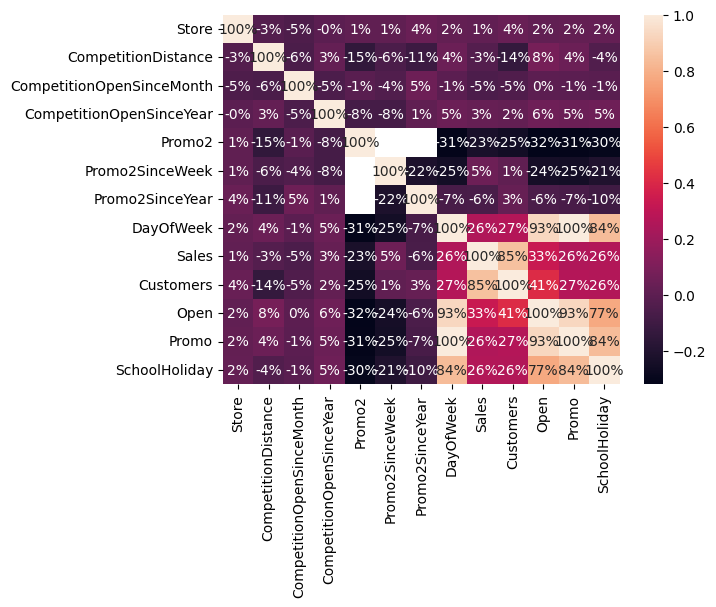

In [6]:
# plot a heatmap of the correlation between the columns

sns.heatmap(df.corr(), annot=True, fmt=".0%")

# make a 

### Als nächstes wird ein genauer Blick auf den Zusammenhang zwischen Sales und dem Wochentag geworfen

In [11]:
# merge the two dataframes using the Store column and put the result in a new dataframe
df_date = pd.merge(df1, df2, on="Store")
df_date.head(5) 


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


<AxesSubplot: xlabel='DayOfWeek', ylabel='Sales'>

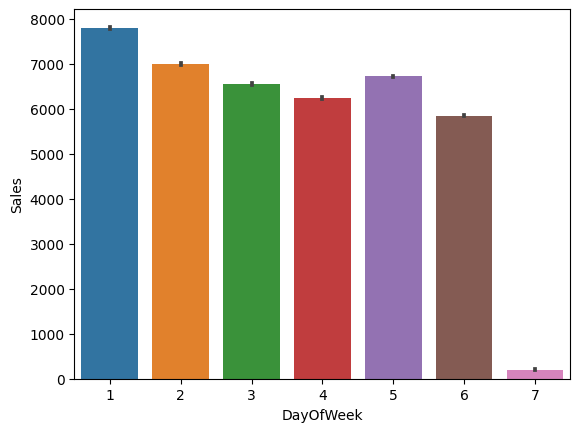

In [10]:
# plot the sales for each day of the week with seaborn
sns.barplot(x="DayOfWeek", y="Sales", data=df_date)


#### Anhand der Heatmap ist zu erkennen, Das der Montag der Tag mit den meisten Sales ist und der Sonntag der Tag mit den wenigsten Sales

/tmp/ipykernel_9042/3349729566.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_date.corr(), annot=True, fmt=".0%")


<AxesSubplot: >

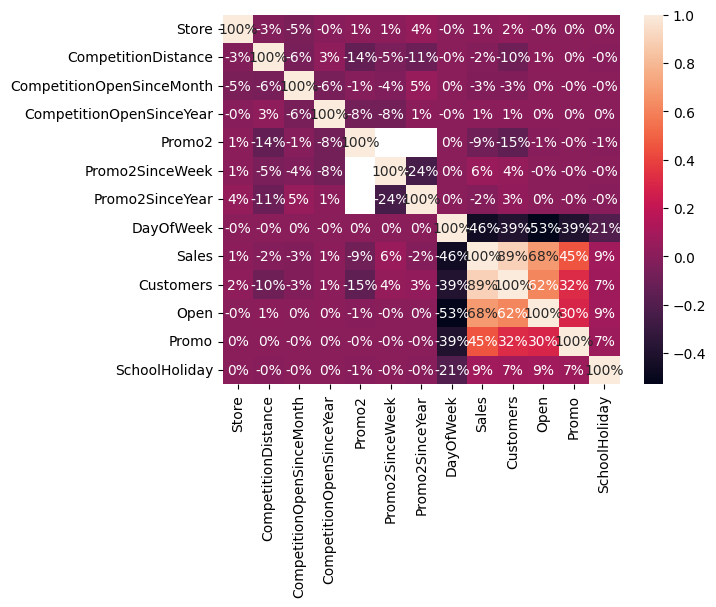

In [12]:
# make a heatmap of the correlation between the columns
sns.heatmap(df_date.corr(), annot=True, fmt=".0%")